In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


2023-02-25 11:15:15.456900: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-25 11:15:15.742444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-25 11:15:17.697584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-25 11:15:17.702400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 11:15:21.133040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
####Hyperparameters####
VOCAB_SIZE = 30000
EMBEDDING_DIM = 16
EPOCHS = 15
MAX_LEN = 32
TRUNC_TYPE = 'post'
PADD_TYPE = 'post'
UNK_TOK = '<UNK>'
TRAINING_SIZE = 1000

print('\nHyperparameters Done\n')


Hyperparameters Done



In [5]:
dataset = pd.read_csv('Spam dataset.csv')
print('dataset: ')

print(dataset.head(), '\n')
print('Null values in the dataset: ')

print(dataset.isnull(), '\n')
print('Sum of Null values in each column: ')

print(dataset.isnull().sum(), '\n')

dataset["Category"] = [1 if each == "spam" else 0 for each in dataset["Category"]]

print('dataset: ')
print(dataset.head(), '\n')

dataset: 
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 

Null values in the dataset: 
      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns] 

Sum of Null values in each column: 
Category    0
Message     0
dtype: int64 

dataset: 
   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u o

In [6]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1, 1)
print('Type of X:', type(X))
print('shape of X: ', X.shape)
#print(X)

Y = dataset.iloc[:, 0].values
y = Y.reshape(-1, 1)
print('Type of Y; ', type(Y))
print('shape of Y: ', y.shape)
#print(y)
X = X.tolist()
y = y.tolist()
print('Length of X: ', len(X), '\n')

Type of X: <class 'numpy.ndarray'>
shape of X:  (5572, 1)
Type of Y;  <class 'numpy.ndarray'>
shape of Y:  (5572, 1)
Length of X:  5572 



In [7]:
####Train test Split####
Training_Sentences = X[TRAINING_SIZE:]
Training_Labels = y[TRAINING_SIZE:]
print('Length of training samples ', len(Training_Sentences), '\n')

Testing_Sentences = X[0: TRAINING_SIZE]
Testing_Lables = y[0:TRAINING_SIZE]
print('Length of testing samples', len(Testing_Sentences), '\n')

Length of training samples  4572 

Length of testing samples 1000 



In [8]:
####TOKENIZING THE WORDS#####
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=UNK_TOK)
tokenizer.fit_on_texts(Training_Sentences)

word_index = tokenizer.word_index

#print(word_index, '\n \n \n')

Training_Sequences = tokenizer.texts_to_sequences(Training_Sentences)
Training_pad = pad_sequences(Training_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

Testing_Sequences = tokenizer.texts_to_sequences(Testing_Sentences)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [9]:
#####BUILDING THE MODEL############

model = tf.keras.Sequential()
print('#####MODEL INSTANCE Done#####')
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print('#########################')
print(model.summary())
print('#########################')

#####MODEL INSTANCE Done#####


2023-02-25 11:15:26.562240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-02-25 11:15:26.574442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-02-25 11:15:26.578403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

#########################
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            480000    
                                                                 
 bidirectional (Bidirectiona  (None, 32, 128)          41472     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (

In [10]:
########Converting to numpy array##########
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)
Training_Labels = np.asarray(Training_Labels)
Testing_Lables = np.asarray(Testing_Lables)

In [11]:
######Training THE MODEL###################
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, Training_Labels, validation_data=(Testing_Sequences_padded, Testing_Lables), epochs=EPOCHS)

Epoch 1/15


2023-02-25 11:15:30.855048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-02-25 11:15:30.862172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-02-25 11:15:30.867541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

143/143 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8659

2023-02-25 11:16:28.591255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-02-25 11:16:28.605273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-02-25 11:16:28.613178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

143/143 [==============================] - 65s 273ms/step - loss: 0.4147 - accuracy: 0.8659 - val_loss: 0.4273 - val_accuracy: 0.8480
Epoch 2/15
143/143 [==============================] - 18s 124ms/step - loss: 0.3887 - accuracy: 0.8699 - val_loss: 0.4284 - val_accuracy: 0.8480
Epoch 3/15
143/143 [==============================] - 18s 129ms/step - loss: 0.3319 - accuracy: 0.8850 - val_loss: 0.6309 - val_accuracy: 0.8820
Epoch 4/15
143/143 [==============================] - 18s 123ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 2.7859 - val_accuracy: 0.2300
Epoch 5/15
143/143 [==============================] - 19s 133ms/step - loss: 4.7703e-04 - accuracy: 1.0000 - val_loss: 4.5791 - val_accuracy: 0.2300
Epoch 6/15
143/143 [==============================] - 18s 127ms/step - loss: 1.2551e-04 - accuracy: 1.0000 - val_loss: 5.1306 - val_accuracy: 0.2300
Epoch 7/15
143/143 [==============================] - 18s 126ms/step - loss: 7.0401e-05 - accuracy: 1.0000 - val_loss: 5.4849 - val_a

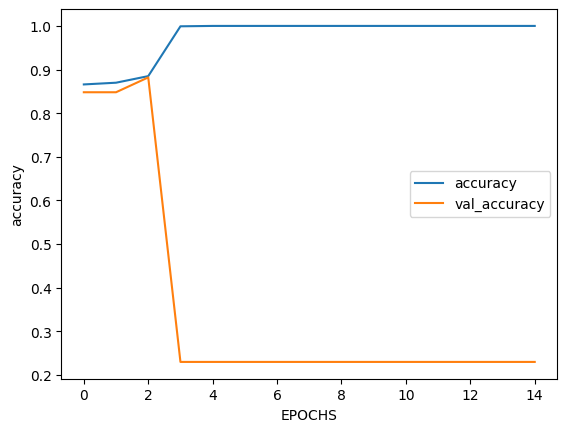

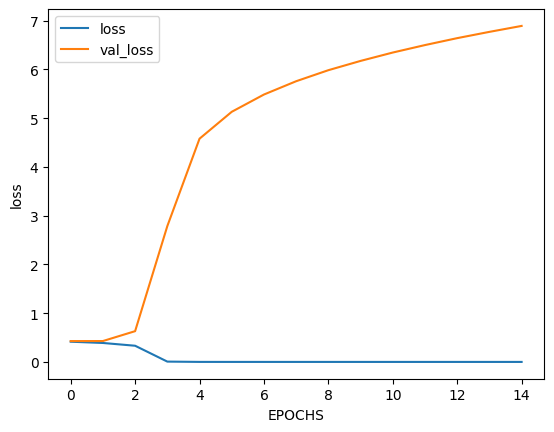

######DONE########


In [17]:
def Plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string ])
    plt.savefig(string + '.png')
    plt.show()
    
    
Plot(history, "accuracy")
Plot(history, "loss")


print("######DONE########")


In [18]:
text = 'WINNER. You won this exciting lottery!!!'
print(text)
Test = tokenizer.texts_to_sequences([text])[0]
Test_padded = pad_sequences([Test], maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)
Test_padded = np.asarray(Test_padded)
print('Done')
print(Test_padded.shape)

ypred = model.predict(Test_padded)

print('output class: ', ypred)

WINNER. You won this exciting lottery!!!
Done
(1, 32)
1/1 [==============================] - 0s 80ms/step
output class:  [[0.9998752]]


In [14]:
y_pred = model.predict(Testing_Sequences_padded)
print(y_pred.shape)

32/32 [==============================] - 1s 27ms/step
(1000, 1)


In [15]:
print(Testing_Lables.shape)

(1000, 1)


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Testing_Lables, y_pred.round(), normalize = False))

230
